## Exercise: Saving and loading data
*from 3.1 - relevant sections = 3.1.2, 3.1.3*


Use YAML or JSON to save your maze data structure to disk and load it again.

The maze would have looked something like this:

In [ ]:
house = {
    "living": {
        "exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"},
        "people": ["James"],
        "capacity": 2,
    },
    "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1},
    "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3},
    "bedroom": {
        "exits": {"downstairs": "living", "jump": "garden"},
        "people": [],
        "capacity": 1,
    },
}

# Exercise/Example: the biggest Earthquake in the UK this Century

## The Problem
`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [1]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [2]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1660565224000,"url":"https://earthquake.usgs.gov'

## Your exercise

Determine the **location** of the **largest magnitude** earthquake in the UK this century.

You can break this exercise down into several subtasks. You'll need to:
### Load the data
* Get the text of the web result
* Parse the data as JSON

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
   
### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

In [30]:
# Answer: Load the data:
import requests
import json

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-08-14", # Change the date to yesterday
        "orderby": "time-asc",
    },
)

### ANS: Load the data

In [32]:
# Can get the data indirectly via the text and then load json text....
my_json_data = json.loads(quakes.text) # Section 3.1 - structured data

# Requests also has a built in json parser
requests_json = quakes.json()

### ANS: Investigate the data

In [33]:
# Look at the type of the data
print(type(my_json_data), type(requests_json))

<class 'dict'> <class 'dict'>


In [41]:
# Look at the dictionary keys
print(requests_json.keys())

dict_keys(['type', 'metadata', 'features', 'bbox'])


In [49]:
# And look at the type of the each value associated with the key
print(f"type = {type(requests_json['type'])}")
print(f"metadata = {type(requests_json['metadata'])}")
print(f"features = {type(requests_json['features'])}")
print(f"bbox = {type(requests_json['bbox'])}")

print(f"The features list is {len(requests_json['features'])} items long")

type = <class 'str'>
metadata = <class 'dict'>
features = <class 'list'>
bbox = <class 'list'>
The features list is 128 items long


### ANS: Search through the data

In [47]:
# Features and bbox look the most interesting as they are lists. Features is likely the one we want
# which is a list of dictionaries...
print(requests_json['features'][0])

{'type': 'Feature', 'properties': {'mag': 2.6, 'place': '12 km NNW of Penrith, United Kingdom', 'time': 956553055700, 'updated': 1415322596133, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 104, 'net': 'us', 'code': 'p0009rst', 'ids': ',usp0009rst,', 'sources': ',us,', 'types': ',impact-text,origin,phase-data,', 'nst': None, 'dmin': None, 'rms': None, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'}, 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}, 'id': 'usp0009rst'}


It looks like the coordinates are in the `geometry` section and the magnitude is in the `properties` section.

In [52]:
print(requests_json["features"][0]['properties']) # Will give access to the magnitude

{'mag': 2.6, 'place': '12 km NNW of Penrith, United Kingdom', 'time': 956553055700, 'updated': 1415322596133, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 104, 'net': 'us', 'code': 'p0009rst', 'ids': ',usp0009rst,', 'sources': ',us,', 'types': ',impact-text,origin,phase-data,', 'nst': None, 'dmin': None, 'rms': None, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'}


In [53]:
print(requests_json["features"][0]['geometry']) # This is the longitude, latitude, and depth of the earthquake

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}


In [54]:
# So for the first dictionary in the list of earthqake events, the magnitude is:
mag = requests_json["features"][0]['properties']['mag']
# And the longitude and latitude are
lon = requests_json["features"][0]['geometry']['coordinates'][0]
lat = requests_json["features"][0]['geometry']['coordinates'][1]

print(f"Magnitude = {mag}, at coordinates {lon}, {lat}")

Magnitude = 2.6, at coordinates -2.81, 54.77


In [55]:
quakes = requests_json["features"]

In [56]:
# We can identify the feature that has the largest quake
largest_so_far = quakes[0]
for quake in quakes:
    if quake["properties"]["mag"] > largest_so_far["properties"]["mag"]:
        largest_so_far = quake
largest_so_far["properties"]["mag"]

4.8

In [57]:
long = largest_so_far["geometry"]["coordinates"][0]
lat = largest_so_far["geometry"]["coordinates"][1]
print(f"Latitude: {lat} Longitude: {long}")

Latitude: 52.52 Longitude: -2.15


### ANS: Visualise

In [58]:
import requests


def request_map_at(lat, long, satellite=True, zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US",
    )

    return requests.get(base, params=params)

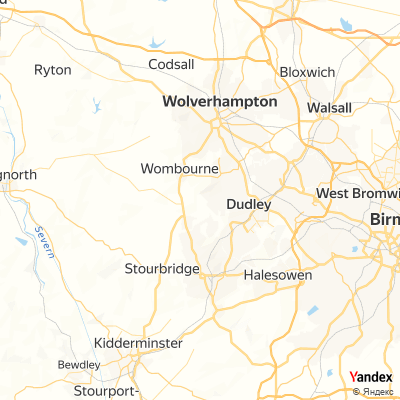

In [67]:
from IPython.display import Image

map_png = request_map_at(lat, long, zoom=10, satellite=False)

Image(map_png.content)

In [76]:
import pandas as pd
new_list = [entry['properties'] for entry in requests_json['features']]
df = pd.DataFrame(new_list)
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,2.6,"12 km NNW of Penrith, United Kingdom",956553055700,1415322596133,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",usp0009rst,",",us,",",impact-text,origin,phase-data,",NaN,NaN,NaN,NaN,ml,earthquake,"M 2.6 - 12 km NNW of Penrith, United Kingdom"
1,4.0,"1 km WSW of Warwick, United Kingdom",969683025790,1415322666913,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",usp000a0pm,",",us,",",impact-text,origin,phase-data,",55.0,NaN,NaN,NaN,ml,earthquake,"M 4.0 - 1 km WSW of Warwick, United Kingdom"
2,4.0,"38 km NNE of Cromer, United Kingdom",977442788510,1415322705662,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",usp000a6hd,",",us,",",origin,phase-data,",27.0,NaN,1.12,NaN,ml,earthquake,"M 4.0 - 38 km NNE of Cromer, United Kingdom"
3,3.3,"171 km ENE of Peterhead, United Kingdom",984608438660,1415322741153,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",usp000abdr,",",us,",",origin,phase-data,",36.0,NaN,1.44,NaN,mb,earthquake,"M 3.3 - 171 km ENE of Peterhead, United Kingdom"
4,2.9,"8 km W of Marlborough, United Kingdom",984879824720,1415322742102,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",usp000abnc,",",us,",",origin,phase-data,",19.0,NaN,0.57,NaN,ml,earthquake,"M 2.9 - 8 km W of Marlborough, United Kingdom"


In [77]:
df['mag'].max()

4.8